In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

--- Basic Information ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 109.4+ KB
None

--- Statistical Summary ---
       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
c

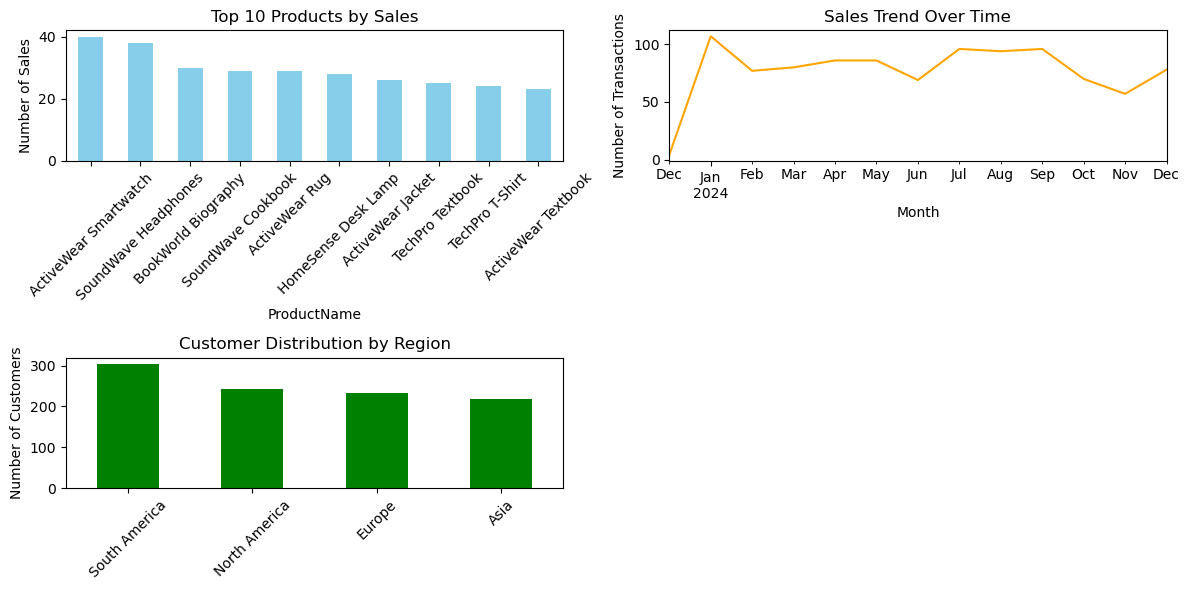

In [4]:
customers = pd.read_csv('D://Projects//Zeotap Assessment//Customers.csv')
products = pd.read_csv('D://Projects//Zeotap Assessment//Products.csv')
transactions = pd.read_csv('D://Projects//Zeotap Assessment//Transactions.csv')

merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


print("--- Basic Information ---")
print(merged_data.info())

print("\n--- Statistical Summary ---")
print(merged_data.describe(include='all'))

print("\n--- Missing Values ---")
print(merged_data.isnull().sum())

def parse_dates(df, column):
    df[column] = pd.to_datetime(df[column])

parse_dates(merged_data, 'SignupDate')
parse_dates(merged_data, 'TransactionDate')

# Top products by sales
product_sales = merged_data.groupby('ProductName').size().sort_values(ascending=False)
print("\n--- Top Products by Sales ---")
print(product_sales.head())

# Sales trend over time
sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M')).size()

# Customer regions
customer_regions = merged_data['Region'].value_counts()

# Average transaction value
avg_transaction_value = merged_data['Price_x'].mean()
print("\n--- Average Transaction Value ---")
print(avg_transaction_value)

plt.figure(figsize=(12, 6))

# 1. Top Products by Sales
plt.subplot(2, 2, 1)
product_sales.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.xticks(rotation=45)
plt.ylabel('Number of Sales')

# 2. Sales Trend
plt.subplot(2, 2, 2)
sales_trend.plot(color='orange')
plt.title('Sales Trend Over Time')
plt.ylabel('Number of Transactions')
plt.xlabel('Month')

# 3. Customer Regions
plt.subplot(2, 2, 3)
customer_regions.plot(kind='bar', color='green')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

In [8]:
pip install fpdf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40713 sha256=57b8aead1b2edccabc7e40a9ccdf14b9c9ecc8552a62d6384eb1acf65f35c12e
  Stored in directory: c:\users\mithu\appdata\local\pip\cache\wheels\65\4f\66\bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.


In [5]:
# I have additionally created a simple business insights pdf using fpdf module which is used to generate PDF files in Python
from fpdf import FPDF

In [7]:
class PDFReport(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Business Insights Report', align='C', ln=1)
        self.ln(10)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', align='C')

pdf = PDFReport()
pdf.add_page()
pdf.set_font('Arial', '', 12)

business_insights = [
    "1. The top-selling products include those frequently purchased as shown in the sales data.",
    "2. Most customers are concentrated in specific regions, leading to regional marketing opportunities.",
    "3. Monthly sales trends show spikes during certain periods, indicating seasonal demand.",
    "4. The average transaction value is approximately ${:.2f}, guiding pricing strategies.".format(avg_transaction_value),
    "5. A significant percentage of customers joined during certain periods, suggesting effective signup campaigns.",
    "6. Customers from certain regions tend to purchase higher-priced products, providing an opportunity for premium product promotion.",
    "7. Products in specific categories are underperforming in sales, highlighting areas for inventory or marketing adjustments."
]

pdf.cell(0, 10, 'Business Insights:', ln=1)
pdf.ln(5)
for insight in business_insights:
    pdf.multi_cell(0, 10, insight)
    pdf.ln(5)

pdf.output('D://Projects//Zeotap Assessment//Bussiness Insights//Business_Insights_Report.pdf')

''